In [1]:
# Download libraries
!pip install scikit-learn
!pip install seaborn
!pip install numpy
!pip install pandas
!pip install scikit-multilearn
!pip install kagglehub
!git lfs install
!git lfs pull
!pip install plotly
!pip install nba_api

Updated Git hooks.
Git LFS initialized.


# Importing libraries and packages

In [2]:

#  git lfs track "*.csv" 
# git lfs track "notebooks/database.db"

import os
import glob
import kagglehub
import sqlite3
import zipfile
import pandas as pd
from io import BytesIO
#Data Wrangling

import numpy as np
import pandas as pd

#Trees
from sklearn import tree
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#Preprocessing Packages
from sklearn.model_selection import train_test_split

#Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Model tuning
from sklearn.model_selection import GridSearchCV

#Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

#Plotting
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Aditonal Data Sources
from nba_api.stats.endpoints import TeamInfoCommon
from nba_api.stats.static import teams

%matplotlib inline

Loading Data Sets

In [3]:
nba_teams = teams.get_teams()
# Create a dictionary of team IDs
team_ids_dict = {team['full_name']: team['id'] for team in nba_teams}
# Create an empty DataFrame to store the data
df_teams = pd.DataFrame()
# Loop through the teams and append to the df
for team_name, team_id in team_ids_dict.items():
    team_info = TeamInfoCommon(team_id=team_id)
    df_team = team_info.get_data_frames()[0]
    df_team['TeamName'] = team_name  # Adding the team name to the DataFrame
    df_teams = pd.concat([df_teams, df_team], ignore_index=True)
# Print the combined DataFrame
df_teams

TEAM_ID SEASON_YEAR      TEAM_CITY      TEAM_NAME TEAM_ABBREVIATION  \
0   1610612737     2024-25        Atlanta          Hawks               ATL   
1   1610612738     2024-25         Boston        Celtics               BOS   
2   1610612739     2024-25      Cleveland      Cavaliers               CLE   
3   1610612740     2024-25    New Orleans       Pelicans               NOP   
4   1610612741     2024-25        Chicago          Bulls               CHI   
5   1610612742     2024-25         Dallas      Mavericks               DAL   
6   1610612743     2024-25         Denver        Nuggets               DEN   
7   1610612744     2024-25   Golden State       Warriors               GSW   
8   1610612745     2024-25        Houston        Rockets               HOU   
9   1610612746     2024-25             LA       Clippers               LAC   
10  1610612747     2024-25    Los Angeles         Lakers               LAL   
11  1610612748     2024-25          Miami           Heat               MIA   
12  1610612749     2024-25      Milwaukee          Bucks               MIL   
13  1610612750     2024-25      Minnesota   Timberwolves               MIN   
14  1610612751     2024-25       Brooklyn           Nets               BKN   
15  1610612752     2024-25       New York         Knicks               NYK   
16  1610612753     2024-25        Orlando          Magic               ORL   
17  1610612754     2024-25        Indiana         Pacers               IND   
18  1610612755     2024-25   Philadelphia          76ers               PHI   
19  1610612756     2024-25        Phoenix           Suns               PHX   
20  1610612757     2024-25       Portland  Trail Blazers               POR   
21  1610612758     2024-25     Sacramento          Kings               SAC   
22  1610612759     2024-25    San Antonio          Spurs               SAS   
23  1610612760     2024-25  Oklahoma City        Thunder               OKC   
24  1610612761     2024-25        Toronto        Raptors               TOR   
25  1610612762     2024-25           Utah           Jazz               UTA   
26  1610612763     2024-25        Memphis      Grizzlies               MEM   
27  1610612764     2024-25     Washington        Wizards               WAS   
28  1610612765     2024-25        Detroit        Pistons               DET   
29  1610612766     2024-25      Charlotte        Hornets               CHA   

   TEAM_CONFERENCE TEAM_DIVISION     TEAM_CODE     TEAM_SLUG   W  L    PCT  \
0             East     Southeast         hawks         hawks   4  7  0.364   
1             East      Atlantic       celtics       celtics   9  2  0.818   
2             East       Central     cavaliers     cavaliers  12  0  1.000   
3             West     Southwest      pelicans      pelicans   3  8  0.273   
4             East       Central         bulls         bulls   4  7  0.364   
5             West     Southwest     mavericks     mavericks   5  5  0.500   
6             West     Northwest       nuggets       nuggets   7  3  0.700   
7             West       Pacific      warriors      warriors   8  2  0.800   
8             West     Southwest       rockets       rockets   7  4  0.636   
9             West       Pacific      clippers      clippers   6  5  0.545   
10            West       Pacific        lakers        lakers   6  4  0.600   
11            East     Southeast          heat          heat   4  5  0.444   
12            East       Central         bucks         bucks   2  8  0.200   
13            West     Northwest  timberwolves  timberwolves   6  4  0.600   
14            East      Atlantic          nets          nets   5  6  0.455   
15            East      Atlantic        knicks        knicks   4  5  0.444   
16            East     Southeast         magic         magic   5  6  0.455   
17            East       Central        pacers        pacers   5  5  0.500   
18            East      Atlantic        sixers        sixers   2  7  0.222   
19            West       Pac

In [4]:
# Path to your zip file
current_dir = os.getcwd()
zip_file_path = current_dir + '/../raw-data/nba-shots.zip'
# list to store dataframes from CSV
csv_dataframes = []
# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_file:
    # Loop through each file in the zip
    for file_name in zip_file.namelist():
        # Check if the file is a CSV
        if file_name.endswith('.csv'):
            # Read the CSV file into a DataFrame
            with zip_file.open(file_name) as file:
                df = pd.read_csv(file)
                csv_dataframes.append(df)  # Store the DataFrame in the dictionary
                print(file_name)

# Now, `csv_dataframes` contains DataFrames for each CSV file
# You can access them by file name, for example:
df = pd.concat(csv_dataframes)
df.head()

NBA_2004_Shots.csv
NBA_2005_Shots.csv
NBA_2006_Shots.csv
NBA_2007_Shots.csv
NBA_2008_Shots.csv
NBA_2009_Shots.csv
NBA_2010_Shots.csv
NBA_2011_Shots.csv
NBA_2012_Shots.csv
NBA_2013_Shots.csv
NBA_2014_Shots.csv
NBA_2015_Shots.csv
NBA_2016_Shots.csv
NBA_2017_Shots.csv
NBA_2018_Shots.csv
NBA_2019_Shots.csv
NBA_2020_Shots.csv
NBA_2021_Shots.csv
NBA_2022_Shots.csv
NBA_2023_Shots.csv
NBA_2024_Shots.csv


SEASON_1 SEASON_2     TEAM_ID               TEAM_NAME  PLAYER_ID  \
0      2004  2003-04  1610612747      Los Angeles Lakers        977   
1      2004  2003-04  1610612757  Portland Trail Blazers        757   
2      2004  2003-04  1610612747      Los Angeles Lakers        977   
3      2004  2003-04  1610612757  Portland Trail Blazers        757   
4      2004  2003-04  1610612757  Portland Trail Blazers        757   

        PLAYER_NAME POSITION_GROUP POSITION   GAME_DATE   GAME_ID  ...  \
0       Kobe Bryant              G       SG  04-14-2004  20301187  ...   
1  Damon Stoudamire              G       PG  04-14-2004  20301187  ...   
2       Kobe Bryant              G       SG  04-14-2004  20301187  ...   
3  Damon Stoudamire              G       PG  04-14-2004  20301187  ...   
4  Damon Stoudamire              G       PG  04-14-2004  20301187  ...   

          BASIC_ZONE         ZONE_NAME ZONE_ABB       ZONE_RANGE LOC_X  LOC_Y  \
0  Above the Break 3  Left Side Center       LC          24+ ft.  20.0  21.35   
1    Restricted Area            Center        C  Less Than 8 ft.  -0.0   5.25   
2          Mid-Range  Left Side Center       LC        16-24 ft.  13.3  24.45   
3          Mid-Range         Left Side        L        16-24 ft.  16.4  13.95   
4          Mid-Range        Right Side        R        16-24 ft. -15.8   7.85   

  SHOT_DISTANCE QUARTER MINS_LEFT SECS_LEFT  
0            25       6         0         0  
1             0       6         0         2  
2            23       6         0         9  
3            18       6         0        31  
4            16       6         0        55  

[5 rows x 26 columns]

# Data Dictionary

**Self-Explanatory**: **TEAM_NAME**, **PLAYER_NAME**, **POSITION_GROUP**, **POSITION**, **HOME_TEAM**, **AWAY_TEAM**

- **SEASON_1** & **SEASON_2**: Season indicator variables  
- **TEAM_ID**: NBA's unique ID variable of that specific team in their API  
- **PLAYER_ID**: NBA's unique ID variable of that specific player in their API  
- **GAME_DATE**: Date of the game (M-D-Y // Month-Date-Year)  
- **GAME_ID**: NBA's unique ID variable of that specific game in their API  
- **EVENT_TYPE**: Character variable denoting a shot outcome (Made Shot // Missed Shot)  
- **SHOT_MADE**: True/False variable denoting a shot outcome (True // False)  
- **ACTION_TYPE**: Description of shot type (layup, dunk, jump shot, etc.)  
- **SHOT_TYPE**: Type of shot (2PT or 3PT)  
- **BASIC_ZONE**: Name of the court zone the shot took place in  
  - Restricted Area, In the Paint (non-RA), Midrange, Left Corner 3, Right Corner 3, Above the Break, Backcourt  
- **ZONE_NAME**: Name of the side of court the shot took place in  
  - left, left side center, center, right side center, right  
- **ZONE_ABB**: Abbreviation of the side of court  
  - (L), (LC), (C), (RC), (R)  
- **ZONE_RANGE**: Distance range of shot by zones  
  - Less than 8 ft., 8-16 ft. 16-24 ft. 24+ ft.  
- **LOC_X**: X coordinate of the shot in the x, y plane of the court (0, 50)  
- **LOC_Y**: Y coordinate of the shot in the x, y plane of the court (0, 50)  
- **SHOT_DISTANCE**: Distance of the shot with respect to the center of the hoop, in feet  
- **QUARTER**: Quarter of the game  
- **MINS_LEFT**: Minutes remaining in the quarter  
- **SECS_LEFT**: Seconds remaining in minute of the quarter  


In [5]:
# inspect the Leagues data set
print("Number of duplicate rows: " + str(df.duplicated().sum()))
print("dtypes:")
print(df.dtypes)
print("----------------------------\nLeagues DF describe:")
print(df.describe())
print("----------------------------\nCheck for Null values:")
print(df.isna().sum())
print("----------------------------\nFirst 5 rows of the dataset")
df.head()

Number of duplicate rows: 192
dtypes:
SEASON_1            int64
SEASON_2           object
TEAM_ID             int64
TEAM_NAME          object
PLAYER_ID           int64
PLAYER_NAME        object
POSITION_GROUP     object
POSITION           object
GAME_DATE          object
GAME_ID             int64
HOME_TEAM          object
AWAY_TEAM          object
EVENT_TYPE         object
SHOT_MADE            bool
ACTION_TYPE        object
SHOT_TYPE          object
BASIC_ZONE         object
ZONE_NAME          object
ZONE_ABB           object
ZONE_RANGE         object
LOC_X             float64
LOC_Y             float64
SHOT_DISTANCE       int64
QUARTER             int64
MINS_LEFT           int64
SECS_LEFT           int64
dtype: object
----------------------------
Leagues DF describe:
           SEASON_1       TEAM_ID     PLAYER_ID       GAME_ID         LOC_X  \
count  4.231262e+06  4.231262e+06  4.231262e+06  4.231262e+06  4.231262e+06   
mean   2.014191e+03  1.610613e+09  4.136611e+05  2.131969e+07  9

SEASON_1 SEASON_2     TEAM_ID               TEAM_NAME  PLAYER_ID  \
0      2004  2003-04  1610612747      Los Angeles Lakers        977   
1      2004  2003-04  1610612757  Portland Trail Blazers        757   
2      2004  2003-04  1610612747      Los Angeles Lakers        977   
3      2004  2003-04  1610612757  Portland Trail Blazers        757   
4      2004  2003-04  1610612757  Portland Trail Blazers        757   

        PLAYER_NAME POSITION_GROUP POSITION   GAME_DATE   GAME_ID  ...  \
0       Kobe Bryant              G       SG  04-14-2004  20301187  ...   
1  Damon Stoudamire              G       PG  04-14-2004  20301187  ...   
2       Kobe Bryant              G       SG  04-14-2004  20301187  ...   
3  Damon Stoudamire              G       PG  04-14-2004  20301187  ...   
4  Damon Stoudamire              G       PG  04-14-2004  20301187  ...   

          BASIC_ZONE         ZONE_NAME ZONE_ABB       ZONE_RANGE LOC_X  LOC_Y  \
0  Above the Break 3  Left Side Center       LC          24+ ft.  20.0  21.35   
1    Restricted Area            Center        C  Less Than 8 ft.  -0.0   5.25   
2          Mid-Range  Left Side Center       LC        16-24 ft.  13.3  24.45   
3          Mid-Range         Left Side        L        16-24 ft.  16.4  13.95   
4          Mid-Range        Right Side        R        16-24 ft. -15.8   7.85   

  SHOT_DISTANCE QUARTER MINS_LEFT SECS_LEFT  
0            25       6         0         0  
1             0       6         0         2  
2            23       6         0         9  
3            18       6         0        31  
4            16       6         0        55  

[5 rows x 26 columns]

In [6]:
df_clean = df.drop_duplicates()
df_clean.head()

SEASON_1 SEASON_2     TEAM_ID               TEAM_NAME  PLAYER_ID  \
0      2004  2003-04  1610612747      Los Angeles Lakers        977   
1      2004  2003-04  1610612757  Portland Trail Blazers        757   
2      2004  2003-04  1610612747      Los Angeles Lakers        977   
3      2004  2003-04  1610612757  Portland Trail Blazers        757   
4      2004  2003-04  1610612757  Portland Trail Blazers        757   

        PLAYER_NAME POSITION_GROUP POSITION   GAME_DATE   GAME_ID  ...  \
0       Kobe Bryant              G       SG  04-14-2004  20301187  ...   
1  Damon Stoudamire              G       PG  04-14-2004  20301187  ...   
2       Kobe Bryant              G       SG  04-14-2004  20301187  ...   
3  Damon Stoudamire              G       PG  04-14-2004  20301187  ...   
4  Damon Stoudamire              G       PG  04-14-2004  20301187  ...   

          BASIC_ZONE         ZONE_NAME ZONE_ABB       ZONE_RANGE LOC_X  LOC_Y  \
0  Above the Break 3  Left Side Center       LC          24+ ft.  20.0  21.35   
1    Restricted Area            Center        C  Less Than 8 ft.  -0.0   5.25   
2          Mid-Range  Left Side Center       LC        16-24 ft.  13.3  24.45   
3          Mid-Range         Left Side        L        16-24 ft.  16.4  13.95   
4          Mid-Range        Right Side        R        16-24 ft. -15.8   7.85   

  SHOT_DISTANCE QUARTER MINS_LEFT SECS_LEFT  
0            25       6         0         0  
1             0       6         0         2  
2            23       6         0         9  
3            18       6         0        31  
4            16       6         0        55  

[5 rows x 26 columns]

In [7]:
# Drop NA records
print("Number of rows containing NA values:\n" + str(df_clean.isna().sum()[df_clean.isna().sum() > 0]))
df_clean = df_clean.dropna()
print("Number of rows containing NA values:\n" + str(df_clean.isna().sum()[df_clean.isna().sum() > 0]))
df_clean[df_clean["POSITION_GROUP"].isna() | df_clean["POSITION"].isna()]

Number of rows containing NA values:
POSITION_GROUP    7930
POSITION          7930
dtype: int64
Number of rows containing NA values:
Series([], dtype: int64)


Empty DataFrame
Columns: [SEASON_1, SEASON_2, TEAM_ID, TEAM_NAME, PLAYER_ID, PLAYER_NAME, POSITION_GROUP, POSITION, GAME_DATE, GAME_ID, HOME_TEAM, AWAY_TEAM, EVENT_TYPE, SHOT_MADE, ACTION_TYPE, SHOT_TYPE, BASIC_ZONE, ZONE_NAME, ZONE_ABB, ZONE_RANGE, LOC_X, LOC_Y, SHOT_DISTANCE, QUARTER, MINS_LEFT, SECS_LEFT]
Index: []

[0 rows x 26 columns]

In [8]:
# Keep only current NBA teams
nba_teams = df_clean[df_clean["SEASON_1"] == 2024].TEAM_NAME.unique()
df_clean = df_clean[df_clean["TEAM_NAME"].isin(nba_teams)]
print(sorted(df_clean.TEAM_NAME.unique()) == sorted(df_teams.TeamName))
# merge on team abbreviation 
df_clean = df_clean.merge(df_teams[['TeamName', 'TEAM_CONFERENCE']], 
                          left_on='TEAM_NAME', right_on='TeamName', how='inner')
print("Number of rows containing NA values:\n" + str(df_clean.isna().sum()[df_clean.isna().sum() > 0]))
df_clean = df_clean.dropna()
print("Number of rows containing NA values:\n" + str(df_clean.isna().sum()[df_clean.isna().sum() > 0]))
df_clean.head()

False
Number of rows containing NA values:
Series([], dtype: int64)
Number of rows containing NA values:
Series([], dtype: int64)


SEASON_1 SEASON_2     TEAM_ID           TEAM_NAME  PLAYER_ID  PLAYER_NAME  \
0      2004  2003-04  1610612747  Los Angeles Lakers        977  Kobe Bryant   
1      2004  2003-04  1610612747  Los Angeles Lakers        977  Kobe Bryant   
2      2004  2003-04  1610612747  Los Angeles Lakers       2567   Brian Cook   
3      2004  2003-04  1610612747  Los Angeles Lakers        977  Kobe Bryant   
4      2004  2003-04  1610612747  Los Angeles Lakers        977  Kobe Bryant   

  POSITION_GROUP POSITION   GAME_DATE   GAME_ID  ... ZONE_ABB  \
0              G       SG  04-14-2004  20301187  ...       LC   
1              G       SG  04-14-2004  20301187  ...       LC   
2              C        C  04-14-2004  20301187  ...        C   
3              G       SG  04-14-2004  20301187  ...        C   
4              G       SG  04-14-2004  20301187  ...       RC   

        ZONE_RANGE LOC_X  LOC_Y SHOT_DISTANCE QUARTER MINS_LEFT SECS_LEFT  \
0          24+ ft.  20.0  21.35            25       6         0         0   
1        16-24 ft.  13.3  24.45            23       6         0         9   
2  Less Than 8 ft.  -0.0   5.25             0       6         1        12   
3          24+ ft.  -1.5  29.95            24       6         1        42   
4        16-24 ft. -14.6  16.75            18       6         2        27   

             TeamName TEAM_CONFERENCE  
0  Los Angeles Lakers            West  
1  Los Angeles Lakers            West  
2  Los Angeles Lakers            West  
3  Los Angeles Lakers            West  
4  Los Angeles Lakers            West  

[5 rows x 28 columns]

In [12]:
print(df_clean[df_clean["TEAM_CONFERENCE"] == "East"]["TEAM_NAME"].unique())
print(df_clean[df_clean["TEAM_CONFERENCE"] == "West"]["TEAM_NAME"].unique())

['Atlanta Hawks' 'Boston Celtics' 'Chicago Bulls' 'Miami Heat'
 'Philadelphia 76ers' 'Washington Wizards' 'Indiana Pacers'
 'Orlando Magic' 'Milwaukee Bucks' 'Toronto Raptors' 'New York Knicks'
 'Cleveland Cavaliers' 'Detroit Pistons' 'Brooklyn Nets'
 'Charlotte Hornets']
['Los Angeles Lakers' 'Portland Trail Blazers' 'Denver Nuggets'
 'San Antonio Spurs' 'Utah Jazz' 'Memphis Grizzlies'
 'Minnesota Timberwolves' 'Phoenix Suns' 'Houston Rockets'
 'Sacramento Kings' 'Dallas Mavericks' 'Golden State Warriors'
 'Oklahoma City Thunder' 'New Orleans Pelicans']


In [10]:
conn = sqlite3.connect("database.db")
df_clean.to_sql("nba", conn, if_exists="replace", index=False)


3865132

# Exploratory Data Analysis (EDA)
- Jump Shot accuracy by Zone (2pt and 3pt)
- Accuracy by action type (done)
- Most efficient players + shot distribution heat map
- Home vs. Performance for teams
- Time trend in accuracy, points,  action type, etc

# Accuracy by action type

In [13]:
action_types_p = df_clean.ACTION_TYPE.unique()
action_types_sql = pd.read_sql("SELECT DISTINCT ACTION_TYPE from nba", conn)
print("Pandas and SQL versions are identical: " + str(len(action_types_p) == len(action_types_sql)))
action_types_p

Pandas and SQL versions are identical: True


array(['Jump Shot', 'Dunk Shot', 'Fadeaway Jump Shot',
       'Driving Finger Roll Shot', 'Layup Shot', 'Running Hook Shot',
       'Tip Shot', 'Driving Dunk Shot', 'Driving Hook Shot',
       'Turnaround Jump Shot', 'Hook Shot', 'Driving Layup Shot',
       'Slam Dunk Shot', 'Running Dunk Shot', 'Follow Up Dunk Shot',
       'Alley Oop Dunk Shot', 'Running Layup Shot', 'Reverse Layup Shot',
       'Jump Hook Shot', 'Jump Bank Shot', 'Running Jump Shot',
       'Turnaround Hook Shot', 'Finger Roll Shot', 'Alley Oop Layup shot',
       'Reverse Dunk Shot', 'Hook Bank Shot',
       'Turnaround Finger Roll Shot', 'Running Finger Roll Shot',
       'Running Tip Shot', 'Driving Finger Roll Layup Shot',
       'Pullup Jump shot', 'Finger Roll Layup Shot', 'Floating Jump shot',
       'Turnaround Fadeaway shot', 'Driving Reverse Layup Shot',
       'Driving Slam Dunk Shot', 'Putback Dunk Shot',
       'Putback Layup Shot', 'Turnaround Bank shot',
       'Running Slam Dunk Shot', 'Step Back Ju

In [14]:
query = '''
SELECT ACTION_TYPE, COUNT(*) AS count
FROM nba
GROUP BY ACTION_TYPE
ORDER BY count DESC
'''
top_action_types_df = pd.read_sql(query, conn)
# top_action_types_df = df_clean.groupby("ACTION_TYPE").agg(count=("ACTION_TYPE", "count")).sort_values(by="count",  ascending=False).reset_index()
top_action_types_df = top_action_types_df[
    top_action_types_df["count"] >= top_action_types_df["count"].quantile(0.75)].reset_index(drop=True)
action_types_75_p = df_clean[df_clean["ACTION_TYPE"].isin(top_action_types_df["ACTION_TYPE"])][
    ["ACTION_TYPE", "SHOT_MADE", "SHOT_DISTANCE"]]
action_types_75_p = action_types_75_p.groupby("ACTION_TYPE").agg(accuracy=("SHOT_MADE", "mean"),
                                                                 avg_distance=("SHOT_DISTANCE", "mean"),
                                                                 count=("SHOT_MADE", "count")).reset_index()
action_types_75_p

ACTION_TYPE  accuracy  avg_distance    count
0               Cutting Layup Shot  0.717644      1.697796    41515
1   Driving Finger Roll Layup Shot  0.674460      1.894011    43712
2       Driving Floating Jump Shot  0.432062      7.906602    63727
3               Driving Layup Shot  0.591557      1.553474   267783
4                        Dunk Shot  0.872831      0.389820    60746
5               Fadeaway Jump Shot  0.468262     12.968798    58715
6               Floating Jump shot  0.482850      8.336147    54607
7                        Hook Shot  0.450924      5.581057    59316
8                        Jump Shot  0.345482     20.107856  1806302
9                       Layup Shot  0.466265      0.892026   389926
10                Pullup Jump shot  0.453565     19.095926   221514
11              Reverse Layup Shot  0.656743      0.861988    38627
12               Running Jump Shot  0.471795     13.540515    62311
13              Running Layup Shot  0.644244      1.581465    52550
14             Step Back Jump shot  0.428215     20.419281    81034
15                  Tip Layup Shot  0.485895      0.384515    37611
16                        Tip Shot  0.474756      0.475319    40821
17            Turnaround Jump Shot  0.464947     10.489279    65059

In [15]:
# Bubble Chart (Scatter Plot with Bubble Size)
# using tuple unpacking for multiple Axes
fig = go.Figure()
fig.update_layout(width=1400, height=800, title="NBA Players Action Type Accuracy, Shot Distance and Attempt Count",
                  xaxis=dict(
                      title="Average Distance from the basket",
                      gridcolor="white",
                      gridwidth=2,
                  ),
                  yaxis=dict(
                      title="Accuracy (%)",
                      gridcolor="white",
                      gridwidth=2,
                  ),
                  )
fig.add_trace(
    go.Scatter(
        x=action_types_75_p["avg_distance"],
        y=action_types_75_p["accuracy"] * 100,
        mode="markers",
        marker=dict(
            size=action_types_75_p["count"],
            sizemode="area",
            sizeref=100,
            color=action_types_75_p["count"],
            colorscale="Viridis",
            showscale=True,
            line_color='rgb(140, 140, 170)',
            colorbar_title='Shots<br>Count',
        ),
        text=action_types_75_p["ACTION_TYPE"],
        hovertemplate=(
                "Action Type: %{text}<br>" +
                "Accuracy: %{y:.2f}<br>" +
                "Average Distance: %{x:.2f}<br>" +
                "Attempt Count: %{marker.size:.0f}"
        ),
        name="Action Types"
    )
)
# Stacked or Grouped Bar Chart
# Heatmap with Annotations
# 3D Scatter Plot

In [16]:
df_clean.head()

SEASON_1 SEASON_2     TEAM_ID           TEAM_NAME  PLAYER_ID  PLAYER_NAME  \
0      2004  2003-04  1610612747  Los Angeles Lakers        977  Kobe Bryant   
1      2004  2003-04  1610612747  Los Angeles Lakers        977  Kobe Bryant   
2      2004  2003-04  1610612747  Los Angeles Lakers       2567   Brian Cook   
3      2004  2003-04  1610612747  Los Angeles Lakers        977  Kobe Bryant   
4      2004  2003-04  1610612747  Los Angeles Lakers        977  Kobe Bryant   

  POSITION_GROUP POSITION   GAME_DATE   GAME_ID  ... ZONE_ABB  \
0              G       SG  04-14-2004  20301187  ...       LC   
1              G       SG  04-14-2004  20301187  ...       LC   
2              C        C  04-14-2004  20301187  ...        C   
3              G       SG  04-14-2004  20301187  ...        C   
4              G       SG  04-14-2004  20301187  ...       RC   

        ZONE_RANGE LOC_X  LOC_Y SHOT_DISTANCE QUARTER MINS_LEFT SECS_LEFT  \
0          24+ ft.  20.0  21.35            25       6         0         0   
1        16-24 ft.  13.3  24.45            23       6         0         9   
2  Less Than 8 ft.  -0.0   5.25             0       6         1        12   
3          24+ ft.  -1.5  29.95            24       6         1        42   
4        16-24 ft. -14.6  16.75            18       6         2        27   

             TeamName TEAM_CONFERENCE  
0  Los Angeles Lakers            West  
1  Los Angeles Lakers            West  
2  Los Angeles Lakers            West  
3  Los Angeles Lakers            West  
4  Los Angeles Lakers            West  

[5 rows x 28 columns]

In [41]:
query = '''
SELECT TEAM_NAME, SEASON_1 as season, SHOT_TYPE, AVG(SHOT_MADE)*100 as accuracy, TEAM_CONFERENCE as conference
FROM nba
GROUP BY SEASON_1, TEAM_CONFERENCE, TEAM_NAME, SHOT_TYPE
'''
# Comparison of 2pt vs. 3pt shots over time
shot_type_df = pd.read_sql(query, conn)
shot_type_df

TEAM_NAME  season       SHOT_TYPE   accuracy conference
0         Atlanta Hawks    2004  2PT Field Goal  45.643939       East
1         Atlanta Hawks    2004  3PT Field Goal  33.546837       East
2        Boston Celtics    2004  2PT Field Goal  47.549834       East
3        Boston Celtics    2004  3PT Field Goal  34.584115       East
4         Chicago Bulls    2004  2PT Field Goal  43.096234       East
...                 ...     ...             ...        ...        ...
1143   Sacramento Kings    2024  3PT Field Goal  36.595216       West
1144  San Antonio Spurs    2024  2PT Field Goal  53.953279       West
1145  San Antonio Spurs    2024  3PT Field Goal  34.730137       West
1146          Utah Jazz    2024  2PT Field Goal  54.468571       West
1147          Utah Jazz    2024  3PT Field Goal  35.415971       West

[1148 rows x 5 columns]

[Text(2004, 0, '2004'),
 Text(2005, 0, '2005'),
 Text(2006, 0, '2006'),
 Text(2007, 0, '2007'),
 Text(2008, 0, '2008'),
 Text(2009, 0, '2009'),
 Text(2010, 0, '2010'),
 Text(2011, 0, '2011'),
 Text(2012, 0, '2012'),
 Text(2013, 0, '2013'),
 Text(2014, 0, '2014'),
 Text(2015, 0, '2015'),
 Text(2016, 0, '2016'),
 Text(2017, 0, '2017'),
 Text(2018, 0, '2018'),
 Text(2019, 0, '2019'),
 Text(2020, 0, '2020'),
 Text(2021, 0, '2021'),
 Text(2022, 0, '2022'),
 Text(2023, 0, '2023'),
 Text(2024, 0, '2024')]

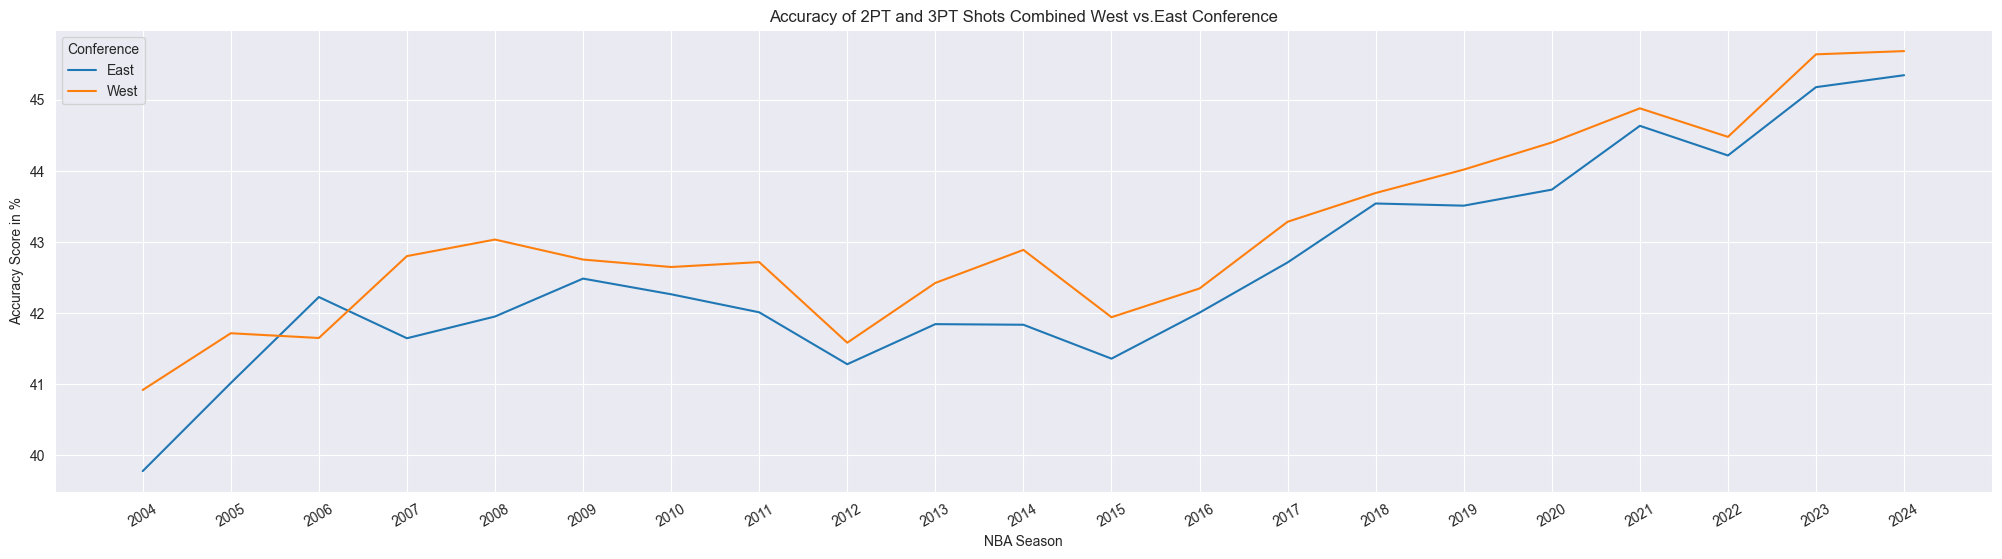

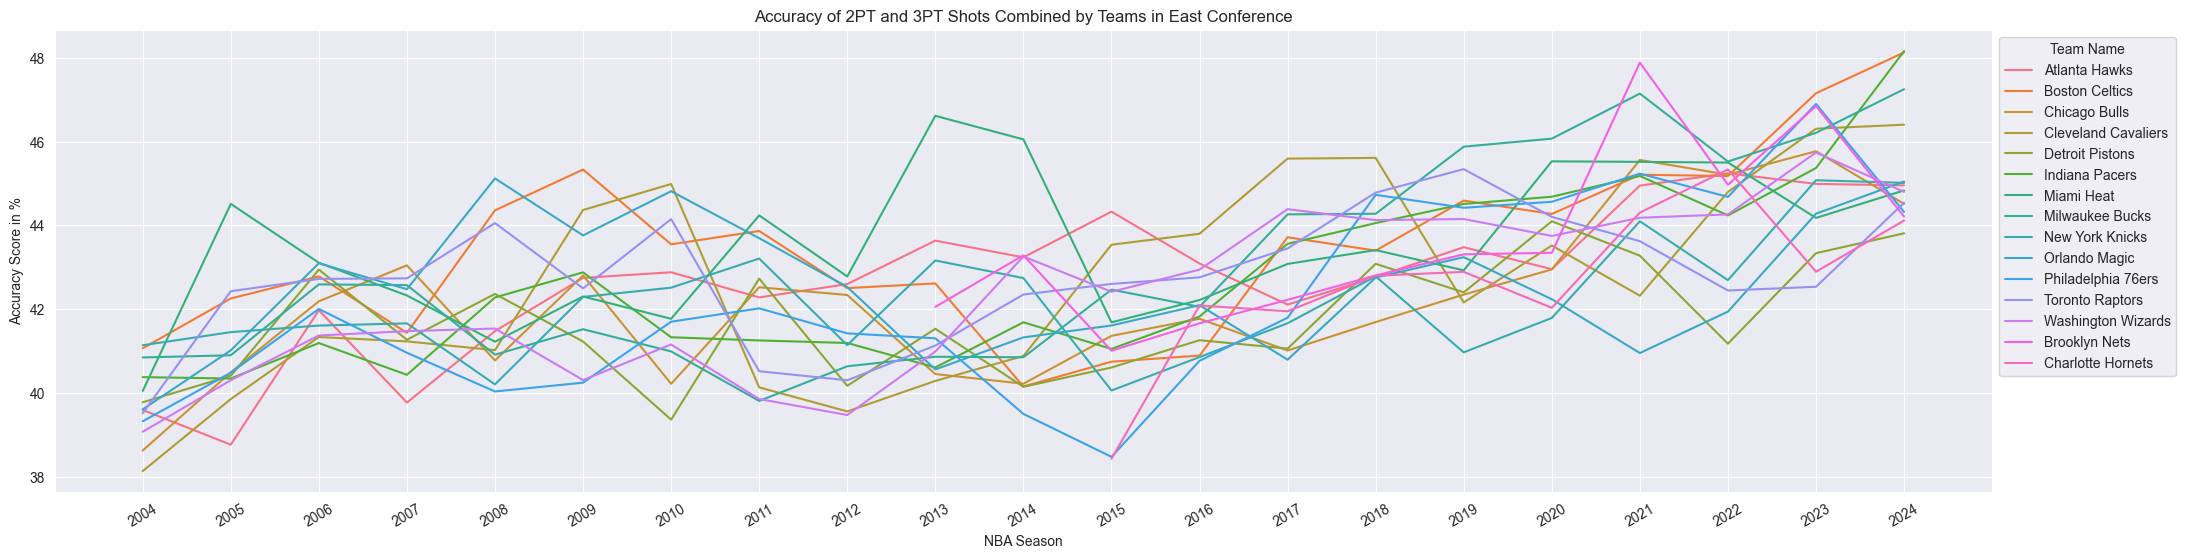

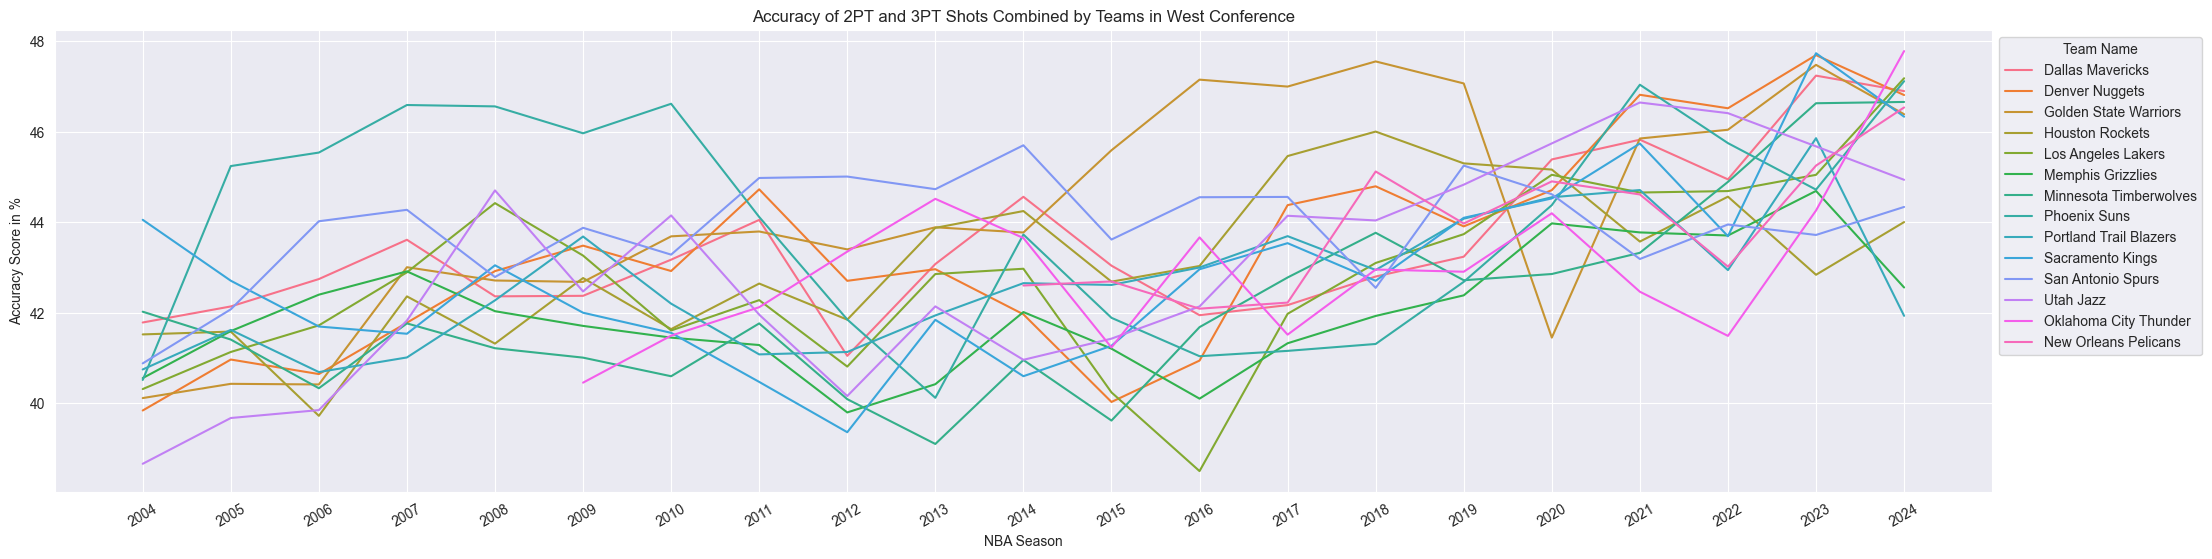

In [42]:

plt.figure(figsize=(25, 6))
sns.lineplot(data=shot_type_df, x="season", y="accuracy", hue="conference", style=None, linestyle='-', markers=False,
             errorbar=None)
plt.legend(title="Conference")
plt.title("Accuracy of 2PT and 3PT Shots Combined West vs.East Conference")
plt.ylabel("Accuracy Score in %")
plt.xlabel("NBA Season")
plt.xticks(rotation=30)
plt.gca().set_xticks(shot_type_df['season'].unique())
plt.gca().set_xticklabels(sorted(shot_type_df['season'].unique()))


plt.figure(figsize=(25, 6))
sns.lineplot(data=shot_type_df[shot_type_df["conference"] == "East"], x="season", y="accuracy", hue="TEAM_NAME", style=None, linestyle='-', markers=False,
             errorbar=None)
plt.legend(loc='upper left', title="Team Name", bbox_to_anchor=(1, 1))
plt.title("Accuracy of 2PT and 3PT Shots Combined by Teams in East Conference")
plt.ylabel("Accuracy Score in %")
plt.xlabel("NBA Season")
plt.xticks(rotation=30)
plt.gca().set_xticks(shot_type_df['season'].unique())
plt.gca().set_xticklabels(sorted(shot_type_df['season'].unique()))

plt.figure(figsize=(25, 6))
sns.lineplot(data=shot_type_df[shot_type_df["conference"] == "West"], x="season", y="accuracy", hue="TEAM_NAME", style=None, linestyle='-', markers=False,
             errorbar=None)
plt.legend(loc='upper left', title="Team Name", bbox_to_anchor=(1, 1))
plt.title("Accuracy of 2PT and 3PT Shots Combined by Teams in West Conference")
plt.ylabel("Accuracy Score in %")
plt.xlabel("NBA Season")
plt.xticks(rotation=30)
plt.gca().set_xticks(shot_type_df['season'].unique())
plt.gca().set_xticklabels(sorted(shot_type_df['season'].unique()))


[Text(2004, 0, '2004'),
 Text(2005, 0, '2005'),
 Text(2006, 0, '2006'),
 Text(2007, 0, '2007'),
 Text(2008, 0, '2008'),
 Text(2009, 0, '2009'),
 Text(2010, 0, '2010'),
 Text(2011, 0, '2011'),
 Text(2012, 0, '2012'),
 Text(2013, 0, '2013'),
 Text(2014, 0, '2014'),
 Text(2015, 0, '2015'),
 Text(2016, 0, '2016'),
 Text(2017, 0, '2017'),
 Text(2018, 0, '2018'),
 Text(2019, 0, '2019'),
 Text(2020, 0, '2020'),
 Text(2021, 0, '2021'),
 Text(2022, 0, '2022'),
 Text(2023, 0, '2023'),
 Text(2024, 0, '2024')]

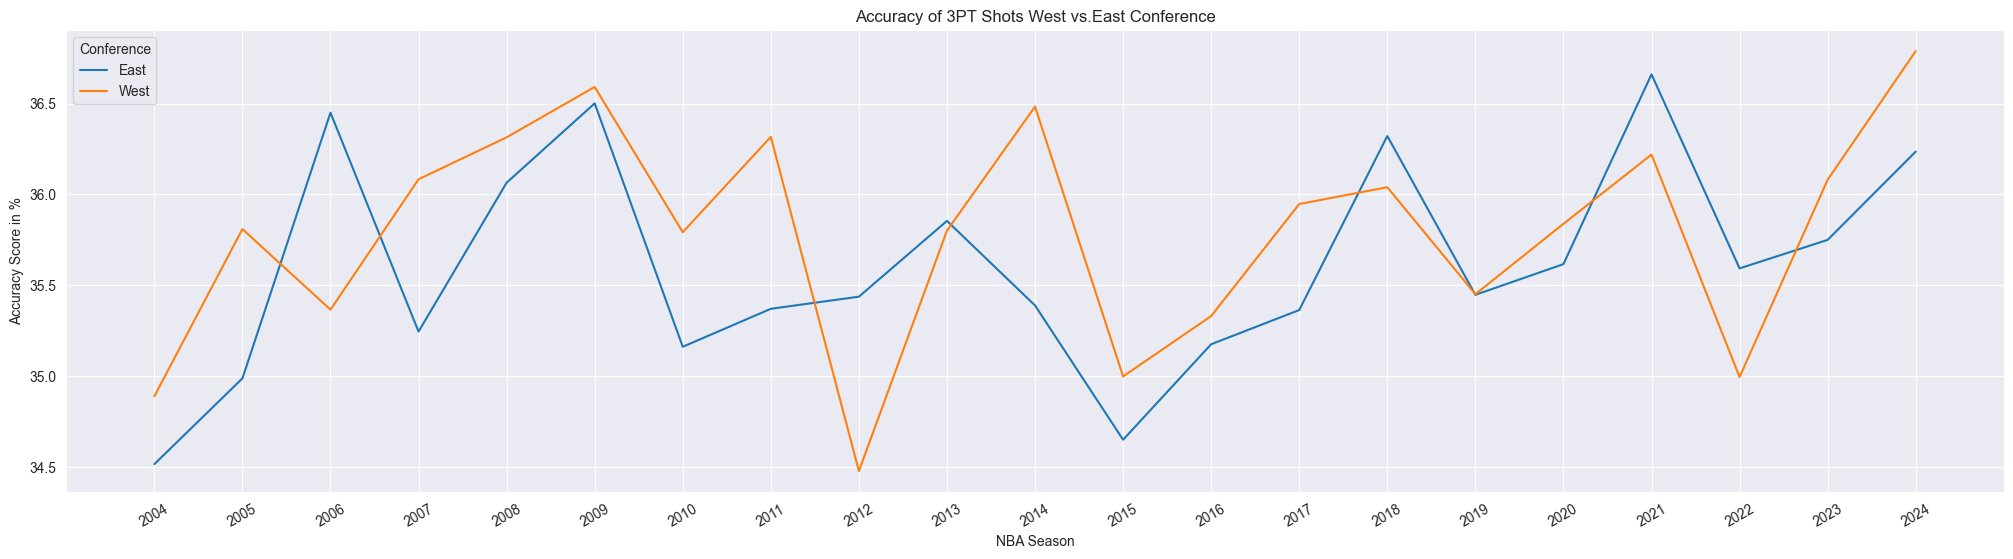

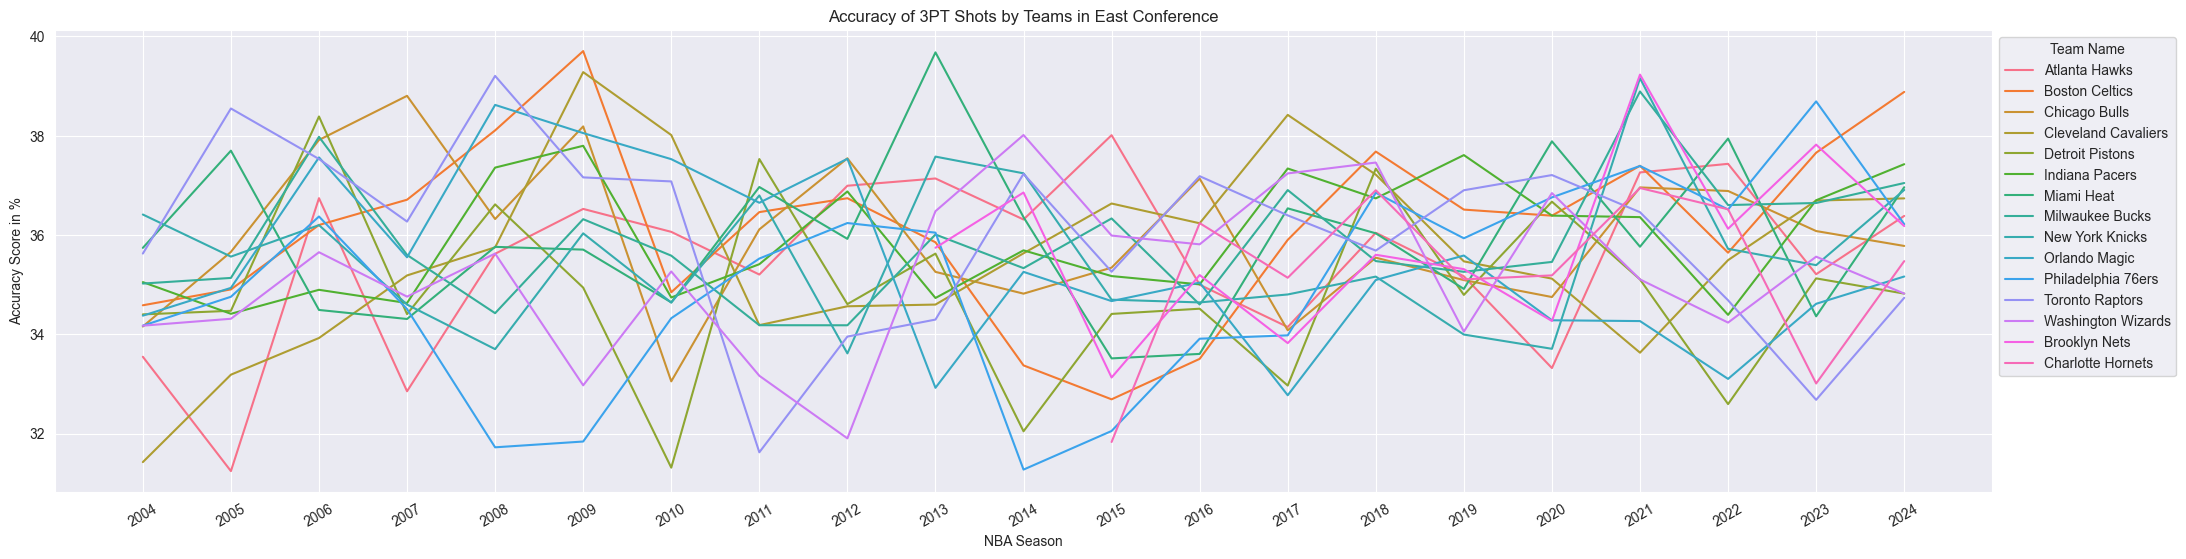

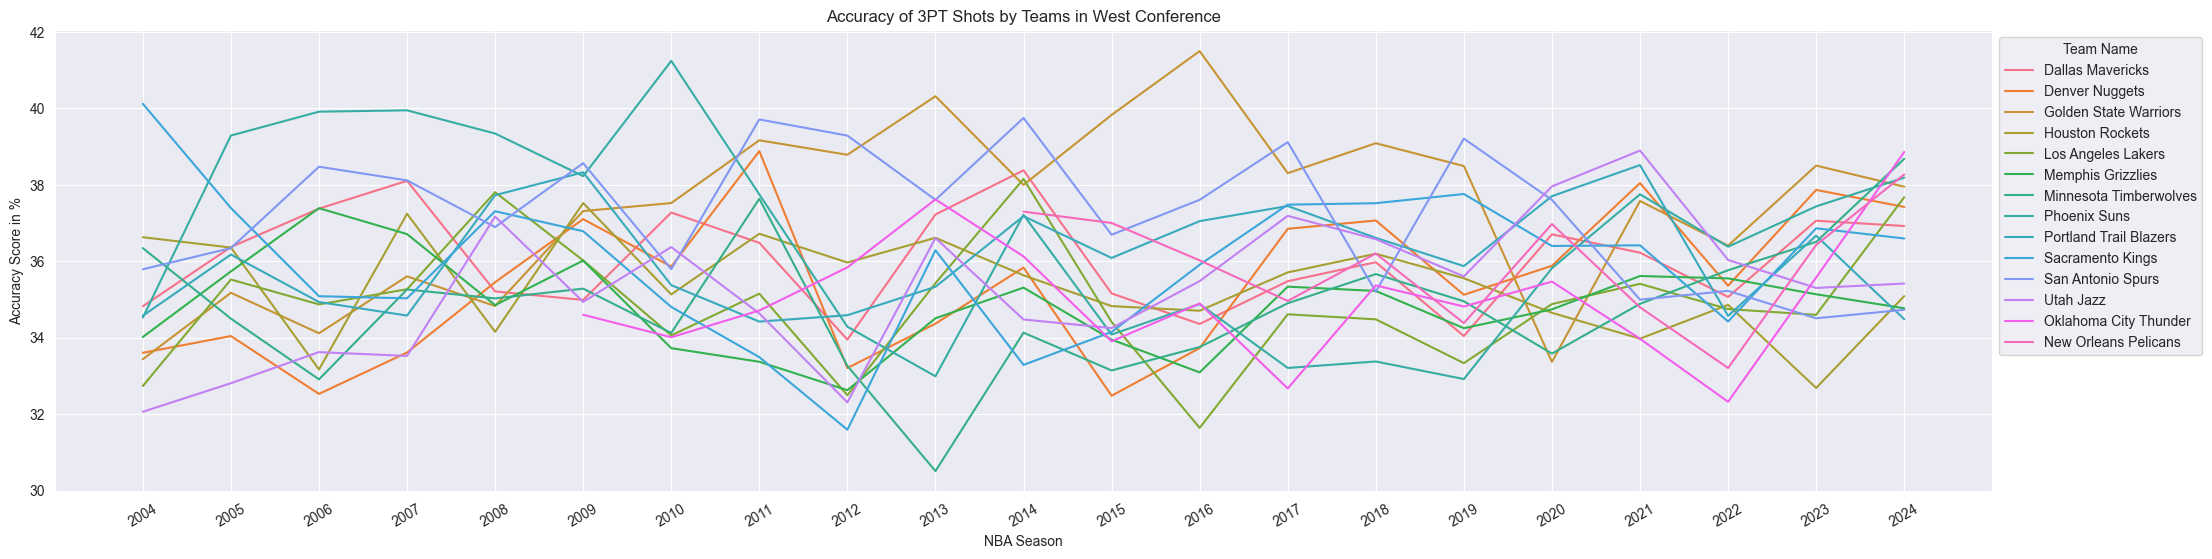

In [43]:
plt.figure(figsize=(25, 6))
sns.lineplot(data=shot_type_df[shot_type_df["SHOT_TYPE"] == "3PT Field Goal"], x="season", y="accuracy", hue="conference", style=None, linestyle='-', markers=False,
             errorbar=None)
plt.legend(title="Conference")
plt.title("Accuracy of 3PT Shots West vs.East Conference")
plt.ylabel("Accuracy Score in %")
plt.xlabel("NBA Season")
plt.xticks(rotation=30)
plt.gca().set_xticks(shot_type_df['season'].unique())
plt.gca().set_xticklabels(sorted(shot_type_df['season'].unique()))


plt.figure(figsize=(25, 6))
sns.lineplot(data=shot_type_df[(shot_type_df["conference"] == "East") & (shot_type_df["SHOT_TYPE"] == "3PT Field Goal")], x="season", y="accuracy", hue="TEAM_NAME", style=None, linestyle='-', markers=False,
             errorbar=None)
plt.legend(loc='upper left', title="Team Name", bbox_to_anchor=(1, 1))
plt.title("Accuracy of 3PT Shots by Teams in East Conference")
plt.ylabel("Accuracy Score in %")
plt.xlabel("NBA Season")
plt.xticks(rotation=30)
plt.gca().set_xticks(shot_type_df['season'].unique())
plt.gca().set_xticklabels(sorted(shot_type_df['season'].unique()))

plt.figure(figsize=(25, 6))
sns.lineplot(data=shot_type_df[(shot_type_df["conference"] == "West") & (shot_type_df["SHOT_TYPE"] == "3PT Field Goal")], x="season", y="accuracy", hue="TEAM_NAME", style=None, linestyle='-', markers=False,
             errorbar=None)
plt.legend(loc='upper left', title="Team Name", bbox_to_anchor=(1, 1))
plt.title("Accuracy of 3PT Shots by Teams in West Conference")
plt.ylabel("Accuracy Score in %")
plt.xlabel("NBA Season")
plt.xticks(rotation=30)
plt.gca().set_xticks(shot_type_df['season'].unique())
plt.gca().set_xticklabels(sorted(shot_type_df['season'].unique()))


[Text(2004, 0, '2004'),
 Text(2005, 0, '2005'),
 Text(2006, 0, '2006'),
 Text(2007, 0, '2007'),
 Text(2008, 0, '2008'),
 Text(2009, 0, '2009'),
 Text(2010, 0, '2010'),
 Text(2011, 0, '2011'),
 Text(2012, 0, '2012'),
 Text(2013, 0, '2013'),
 Text(2014, 0, '2014'),
 Text(2015, 0, '2015'),
 Text(2016, 0, '2016'),
 Text(2017, 0, '2017'),
 Text(2018, 0, '2018'),
 Text(2019, 0, '2019'),
 Text(2020, 0, '2020'),
 Text(2021, 0, '2021'),
 Text(2022, 0, '2022'),
 Text(2023, 0, '2023'),
 Text(2024, 0, '2024')]

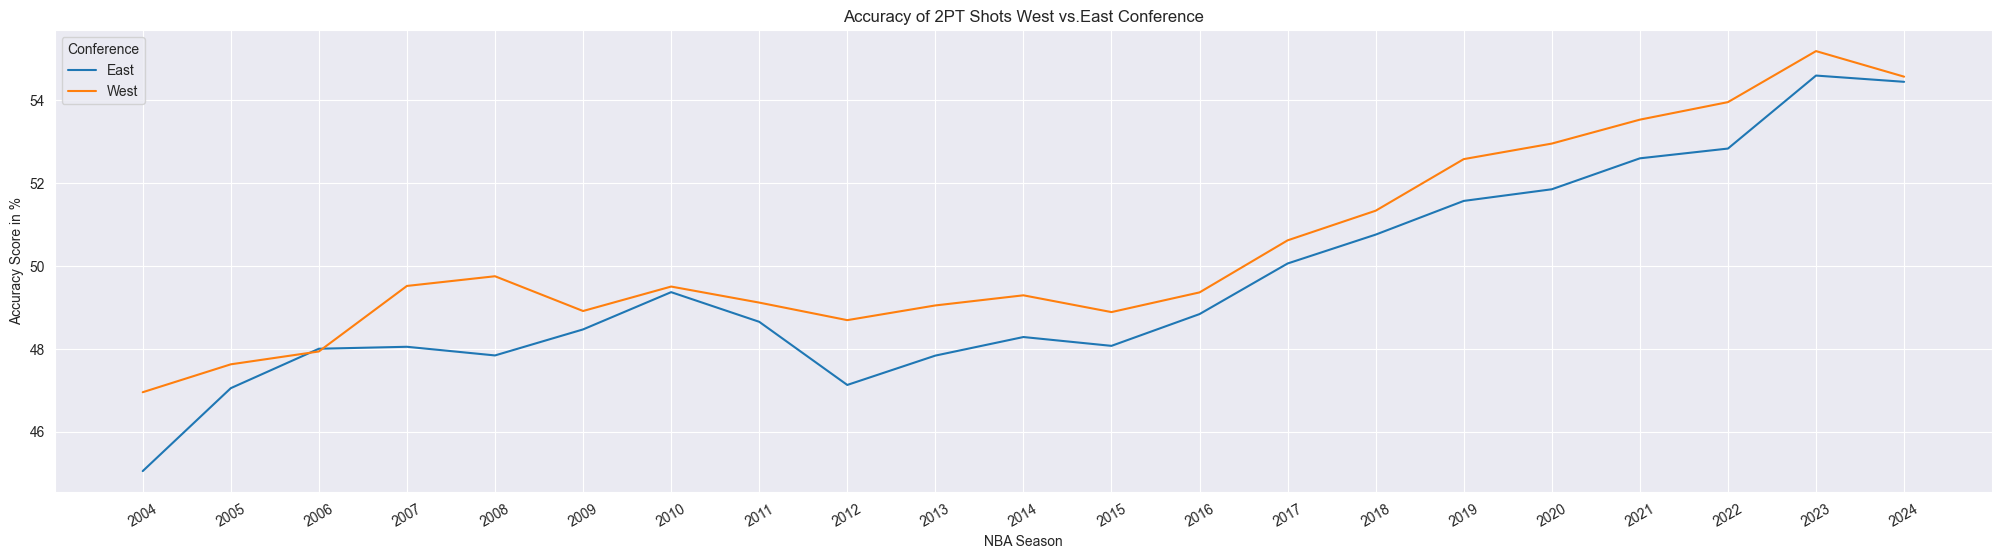

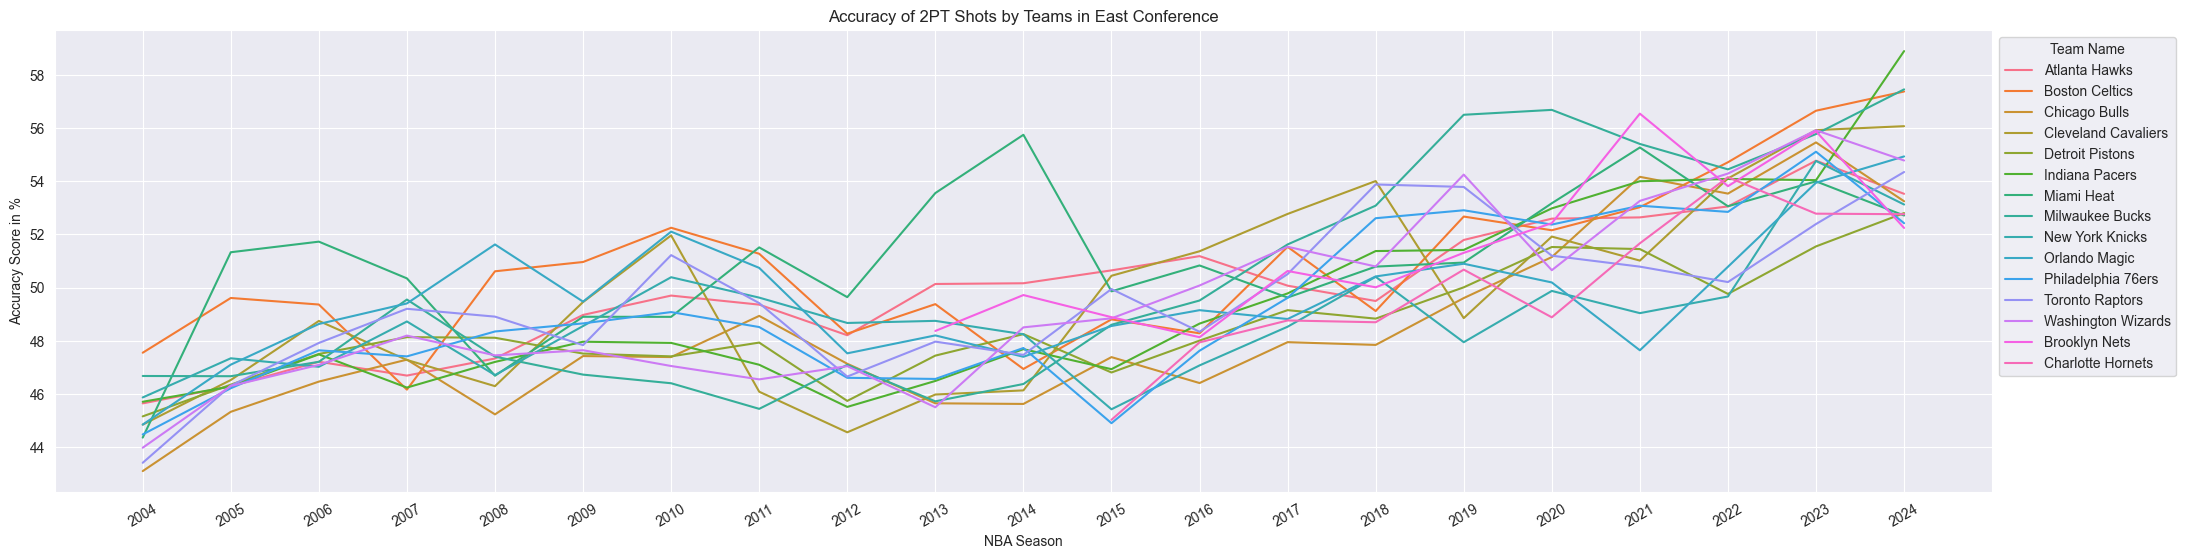

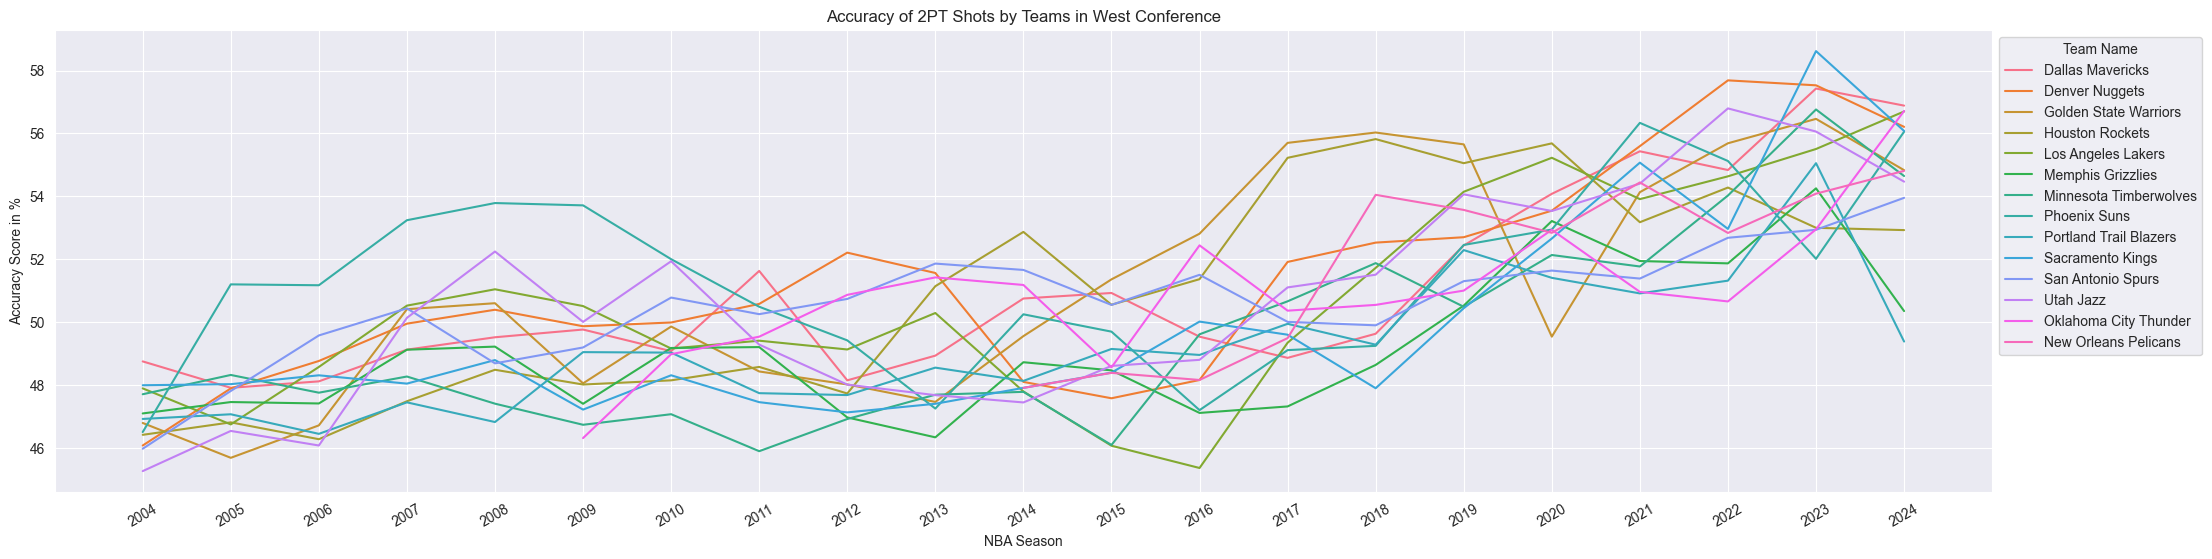

In [44]:

plt.figure(figsize=(25, 6))
sns.lineplot(data=shot_type_df[shot_type_df["SHOT_TYPE"] == "2PT Field Goal"], x="season", y="accuracy",
             hue="conference", style=None, linestyle='-', markers=False,
             errorbar=None)
plt.legend(title="Conference")
plt.title("Accuracy of 2PT Shots West vs.East Conference")
plt.ylabel("Accuracy Score in %")
plt.xlabel("NBA Season")
plt.xticks(rotation=30)
plt.gca().set_xticks(shot_type_df['season'].unique())
plt.gca().set_xticklabels(sorted(shot_type_df['season'].unique()))

plt.figure(figsize=(25, 6))
sns.lineplot(
    data=shot_type_df[(shot_type_df["conference"] == "East") & (shot_type_df["SHOT_TYPE"] == "2PT Field Goal")],
    x="season", y="accuracy", hue="TEAM_NAME", style=None, linestyle='-', markers=False,
    errorbar=None)
plt.legend(loc='upper left', title="Team Name", bbox_to_anchor=(1, 1))
plt.title("Accuracy of 2PT Shots by Teams in East Conference")
plt.ylabel("Accuracy Score in %")
plt.xlabel("NBA Season")
plt.xticks(rotation=30)
plt.gca().set_xticks(shot_type_df['season'].unique())
plt.gca().set_xticklabels(sorted(shot_type_df['season'].unique()))

plt.figure(figsize=(25, 6))
sns.lineplot(
    data=shot_type_df[(shot_type_df["conference"] == "West") & (shot_type_df["SHOT_TYPE"] == "2PT Field Goal")],
    x="season", y="accuracy", hue="TEAM_NAME", style=None, linestyle='-', markers=False,
    errorbar=None)
plt.legend(loc='upper left', title="Team Name", bbox_to_anchor=(1, 1))
plt.title("Accuracy of 2PT Shots by Teams in West Conference")
plt.ylabel("Accuracy Score in %")
plt.xlabel("NBA Season")
plt.xticks(rotation=30)
plt.gca().set_xticks(shot_type_df['season'].unique())
plt.gca().set_xticklabels(sorted(shot_type_df['season'].unique()))

# Predictive Models
- Shot success and accuracy prediction model
- Players synergy and selection model ? 

In [ ]:
conn.close()